# **2️⃣0️⃣ Cross-Entropy Loss: Concept & Its Role in Training Neural Networks 📊🔥🤖**

## **💡 Real-Life Analogy: The Referee’s Scoring System in a Football Match ⚽👨‍⚖️**
Imagine a football referee who must decide whether each play is correct or incorrect.
- **Correct decisions** get **no penalty** and add to the team's confidence.
- **Wrong decisions**, especially when made with high confidence, result in **severe penalties** that hurt the team’s score.
- Similarly, **cross-entropy loss** punishes a model **heavily for confident mistakes** and rewards it when its predicted probabilities closely match the actual outcomes. 🎯🚫

## **📌 What is Cross-Entropy Loss?**
✅ **Cross-Entropy Loss** is a measure of the difference between two probability distributions.
- It compares the **true distribution** (actual labels) with the **predicted distribution** (model output).
- It is commonly used in **classification problems** (both binary and multi-class) to quantify how far the model’s predictions are from the true labels.
- **Key Idea**: The loss is low when the predicted probability for the correct class is high and high when the prediction is incorrect or the model is overly confident in a wrong prediction. 🤖✅

### **Mathematical Formulation:**

- **For Binary Classification** (using labels $y \in \{0, 1\}$):

  $$
  L = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right]
  $$
  - $\hat{y}$: The predicted probability for the positive class.
  - If $y = 1$ and $\hat{y}$ is low, the loss becomes **very high**.

- **For Multi-Class Classification** (with one-hot encoded labels):

  $$
  L = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
  $$
  - $C$: Number of classes.
  - $y_i$: True label for class $i$ (1 for the correct class, 0 for others).
  - $\hat{y}_i$: Predicted probability for class $i$.

✅ **Why Use Cross-Entropy Loss?**
- It provides **smooth gradients** for training via backpropagation.
- It **penalizes confident wrong predictions** more than less confident ones, which helps the model learn to be calibrated in its predictions.
- It is **differentiable**, making it suitable for gradient-based optimization algorithms like SGD, Adam, etc. 🔄📈

## **🔍 How Is It Used in Training Neural Networks?**
1. **Model Output**:
   - The network typically ends with a **softmax layer** (for multi-class) or a **sigmoid layer** (for binary), producing a probability distribution over classes.
2. **Loss Computation**:
   - Cross-entropy loss is computed by comparing the predicted probabilities with the true labels.
3. **Backpropagation**:
   - The computed loss is then **backpropagated** to update the model weights, reducing the difference between the predicted and true distributions over time.
4. **Optimization**:
   - Optimizers (e.g., Adam, SGD) use the gradients from the cross-entropy loss to adjust weights in a way that minimizes this loss, leading to a more accurate model.

## **📊 Sports Example: Predicting Win/Loss in Football ⚽**
Imagine you’re building a neural network to predict whether a football team will win (1) or lose (0) based on match statistics (shots, possession, etc.).
- **True Labels**: Represented as 0 (loss) or 1 (win).
- **Predicted Probabilities**: The model outputs a probability (e.g., 0.85 for a win).
- **Cross-Entropy Loss Calculation**:
  - If the team **actually wins** ($y = 1$) and the model predicts $\hat{y} = 0.85$, the loss is:
    $$
    L = -\log(0.85)
    $$
  - If the model predicted a low probability for a win, the loss would be much higher, strongly penalizing the mistake. ⚽🚫

## **🛠️ Python Code Example: Using Cross-Entropy Loss in a Neural Network**
Below is an example using TensorFlow/Keras to build a simple neural network for a binary classification problem (simulating sports match outcomes). We’ll use **cross-entropy loss** during training and visualize the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set seeds for reproducibility 🔒
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# Generate Synthetic Sports Data ⚽
# Features: [Shots on Target, Possession %] (simplified)
# Target: 1 if team wins, 0 if team loses
n_samples = 300
shots = np.random.randint(0, 11, n_samples)            # 0 to 10 shots
possession = np.random.randint(30, 101, n_samples)       # 30% to 100% possession

# Create feature matrix X and binary target y using a simple rule:
X = np.vstack([shots, possession]).T.astype(np.float32)
# If (0.4 * shots + 0.01 * possession) > 3, predict win (1), else loss (0)
y = ((0.4 * shots + 0.01 * possession) > 3).astype(int)

# Normalize features
X[:, 0] /= 10.0  # Normalize shots
X[:, 1] /= 100.0  # Normalize possession

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Build a Simple Neural Network Model 📊
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid outputs probability for binary classification
])

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the Model & Capture Training History 📈
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5763 - loss: 0.7031 - val_accuracy: 0.5952 - val_loss: 0.6568
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.6432 - val_accuracy: 0.5952 - val_loss: 0.6160
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.6006 - val_accuracy: 0.5952 - val_loss: 0.5784
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.5600 - val_accuracy: 0.5952 - val_loss: 0.5428
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.5196 - val_accuracy: 0.5952 - val_loss: 0.5063
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.4832 - val_accuracy: 0.8333 - val_loss: 0.4714
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8408 - loss: 0.4483 - val_accuracy: 0.8571 - val_loss: 0.4374
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8659 - loss: 0.4177 - val_accuracy: 0.8571 - val_loss:

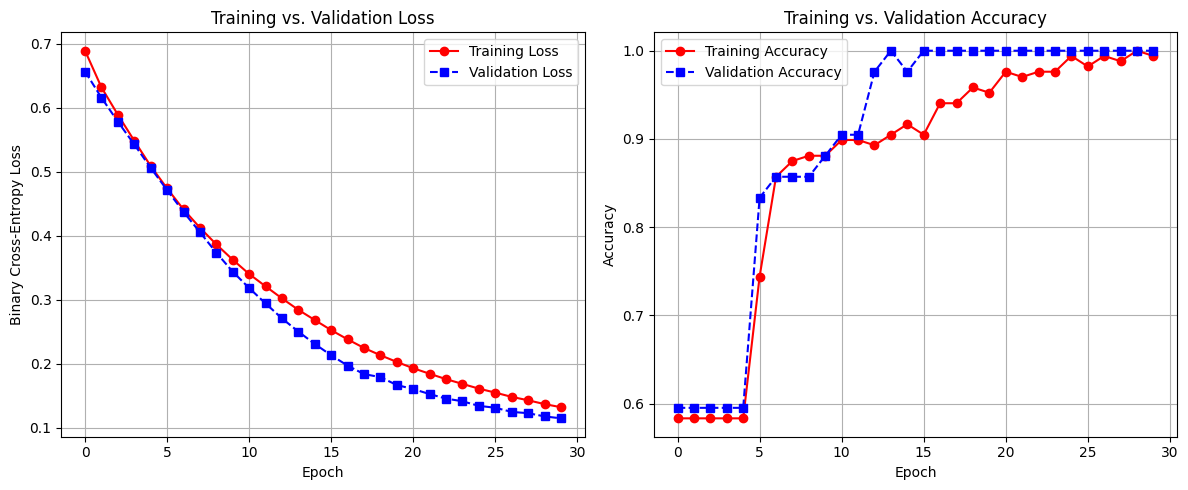

In [5]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r-', marker='o', label="Training Loss")
plt.plot(history.history['val_loss'], 'b--', marker='s', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'r-', marker='o', label="Training Accuracy")
plt.plot(history.history['val_accuracy'], 'b--', marker='s', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Overall Interpretation**



- **Training vs. Validation Performance**:  
  - The training metrics (accuracy and loss) show a steady improvement, with accuracy increasing and loss decreasing.
  - The validation metrics follow a similar trend, which suggests that the model is generalizing reasonably well to unseen data.
  
- **Model Learning**:  
  - The increase in accuracy and decrease in loss (both training and validation) indicate that the model is learning the underlying patterns in the data.
  
- **Potential Overfitting Concerns**:  
  - In some scenarios, if training accuracy is near 100% but validation accuracy stagnates or drops, it might signal overfitting. In this output, validation accuracy eventually reaches 100% as well, which is promising—but it's essential to monitor for any signs of overfitting with more complex data or extended training.


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"🔍 Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc*100:.2f}%")

🔍 Test Loss: 0.1420 | Test Accuracy: 100.00%


In [7]:
# Make predictions on a few samples from the test set
predictions = model.predict(X_test[:10])
print("Predicted Probabilities:", np.round(predictions.flatten(), 3))
print("Actual Labels:", y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Probabilities: [0.837 0.837 0.837 0.837 0.716 0.837 0.329 0.694 0.553 0.065]
Actual Labels: [1 1 1 1 1 1 0 1 1 0]


### **Explanation of the Code & Output:**


- **Model Architecture**:  
  - The network uses **Dense layers** with ReLU activations for hidden layers and a **sigmoid activation** in the output layer to produce probabilities.
- **Loss Function**:  
  - **Binary cross-entropy loss** is used, which penalizes the model more when it is confident about an incorrect prediction.
- **Training**:  
  - The model is trained on synthetic sports data where the outcome (win/loss) is determined by match statistics.
- **Visualization**:  
  - Loss and accuracy curves are plotted, showing how the model learns over epochs.
- **Predictions**:  
  - The predicted probabilities for test samples are compared against actual labels.


## **🔥 Final Takeaways**  


1. **Cross-Entropy Loss** measures the difference between the true label distribution and the predicted distribution.  
2. It is **critical for classification tasks** because it **penalizes confident errors** and drives the model to output probabilities close to the true labels.  
3. **Mathematically**, it is defined as:
   - **Binary**: $ L = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})] $  
   - **Multi-Class**: $ L = -\sum_{i=1}^{C} y_i \log(\hat{y}_i) $
4. **In practice**, cross-entropy loss is used with a **sigmoid or softmax output layer** in neural networks, and its gradients are used in backpropagation to update model weights.  
5. Our **Python example** shows how to implement and train a neural network with cross-entropy loss on synthetic sports data, along with visualizations that make the training process clear and engaging. 🎉📊🤖